# CS 5683 - Big Data Analytics
## Assignment - 5: Graphs
## Suraj Pawar (A20163517)

In [37]:
import networkx as nx

### Assignment Total: 10 points (3% of final)

This is a self-learning assignment for graphs. You will explore a python package called networkx to find some properties of a given graph

NetworkX documentation: https://networkx.org/documentation/stable/reference/index.html

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##### Use the social network data 'soc-Epinions1.txt' given in Canvas

In [38]:
# NOTE: The data is given as an edgelist
# Meaning: each edge (node1,node2) in one line of the input file
input_data = '/content/drive/My Drive/Coursework/CS 5683_Big_Data/Assignment-5/soc-Epinions1.txt' #''soc-Epinions1.txt'

In [39]:
# Load the data as a directed graph
# Note: networkx read_edgelist will read the graph as undirected graph
fh = open(input_data, "rb")
G_directed = nx.read_edgelist(input_data, create_using= nx.DiGraph())
G_unidirected = nx.read_edgelist(input_data)
fh.close()

##### Print the following basic properties of the given graph

In [40]:
# Print the number of nodes and edges in the graph here (1 Point)
num_nodes = G_directed.number_of_nodes()
num_edges = G_directed.number_of_edges()
print(f"Number of nodes is {num_nodes}" )
print(f"Number of edges is {num_edges}" )

Number of nodes is 75879
Number of edges is 508837


In [41]:
# Print the number of connected components here (1 Point)
# NOTE: There is a networkx package for this
num_connected_compoents = nx.number_connected_components(G_unidirected) 
print(f"Number of connected components is {num_connected_compoents}" )


Number of connected components is 2


In [42]:
# Print the number of nodes in each component here(1 Point)
l = list(nx.connected_components(G_unidirected))
print(f'The number of nodes in the first component is {len(l[0])}')
print(f'The number of nodes in the second component is {len(l[1])}' )

The number of nodes in the first component is 75877
The number of nodes in the second component is 2


In [43]:
# Delete all nodes from the smallest component in the graph 
# And, print the number of node again here (1 Point)
for node in min(nx.connected_components(G_unidirected), key=len):
  G_directed.remove_node(node)
  print(f"{node} removed")

num_nodes = G_directed.number_of_nodes()
print(f"Number of nodes is in the graph is {num_nodes}" )


74845 removed
71749 removed
Number of nodes is in the graph is 75877


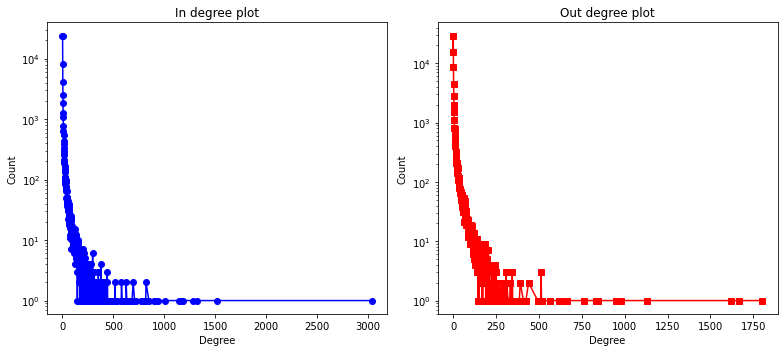

In [44]:
# Plot the degree distribution of the graph with a line graph here (4 Points)
# NOTE: You have to plot both in-degree and out-degree distribution in the same plot
# REFERENCE: https://networkx.org/documentation/stable/auto_examples/drawing/plot_degree_histogram.html
# You have to get both in_degree and out_degree
# You have to use line plot instead of a histogram

import collections
import matplotlib.pyplot as plt

degree_sequence_in = sorted([d for n, d in G_directed.in_degree()], reverse=True)  # degree sequence
degree_sequence_out = sorted([d for n, d in G_directed.out_degree()], reverse=True)  # degree sequence

fig, ax = plt.subplots(1,2,figsize=(11,5))

degreeCount = collections.Counter(degree_sequence_in)
deg, cnt = zip(*degreeCount.items())
ax[0].semilogy(deg, cnt, "bo-")
ax[0].set_title("In degree plot")
ax[0].set_ylabel("Count")
ax[0].set_xlabel("Degree")

degreeCount = collections.Counter(degree_sequence_out)
deg, cnt = zip(*degreeCount.items())
ax[1].semilogy(deg, cnt, "rs-")
ax[1].set_title("Out degree plot")
ax[1].set_ylabel("Count")
ax[1].set_xlabel("Degree")

# ax.set_xticks([d + 0.4 for d in deg])
#ax.set_xticklabels(deg)
fig.tight_layout()
plt.show()



In [45]:
# Find pagerank of all nodes in the given graph (2 Points)
# And, print top 10 nodes based on pagerank and their corresponding pagerank scores
pr = nx.pagerank(G_directed)
pr_sort = {k: v for k, v in sorted(pr.items(), key=lambda item: -item[1])}

from itertools import islice

def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))

n_items = take(10, pr_sort.items())

for item in n_items:
  print(item)
  

('18', 0.004657231788608864)
('737', 0.0028807122172918418)
('1719', 0.002154581431371963)
('790', 0.002121539825820732)
('118', 0.002058844652824279)
('136', 0.002035196636433736)
('143', 0.002003692743449366)
('40', 0.0015924031130032901)
('1619', 0.0015263447209551528)
('4415', 0.001478191526616753)
